In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Load Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [3]:
# Data Exploration
print("Dataset Info:\n", df.info())
print("\nSummary Statistics:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
Dataset Info:
 None

Summary Statistics:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max   

In [4]:
# Feature Scaling
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [5]:
# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

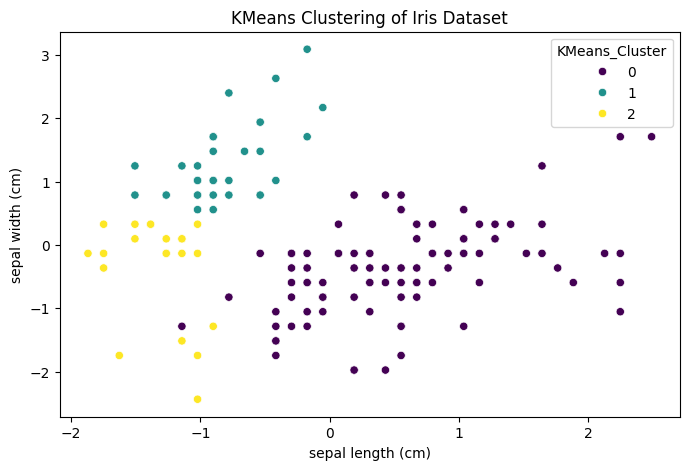

In [6]:
# Visualizing KMeans Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=df_scaled['KMeans_Cluster'], palette='viridis')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title("KMeans Clustering of Iris Dataset")
plt.show()

In [7]:
# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
df_scaled['Hierarchical_Cluster'] = hierarchical.fit_predict(df_scaled.drop(columns=['KMeans_Cluster']))

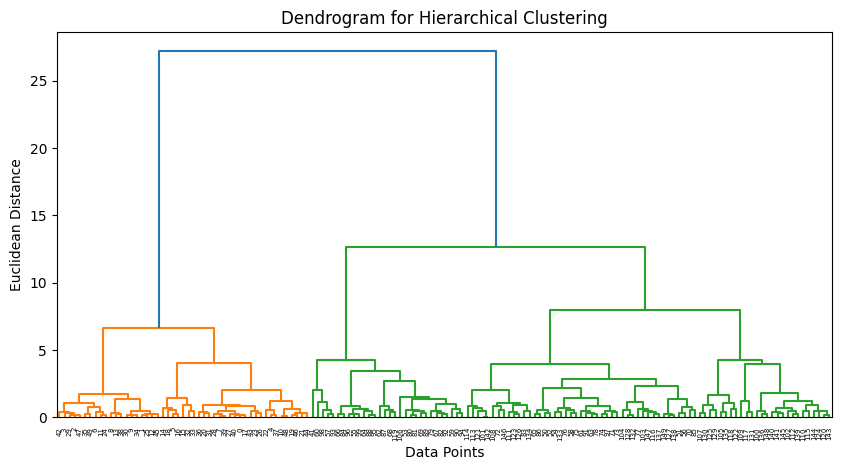

In [8]:
# Dendrogram for Hierarchical Clustering
plt.figure(figsize=(10, 5))
z = linkage(df_scaled.drop(columns=['KMeans_Cluster', 'Hierarchical_Cluster']), method='ward')
dendrogram(z)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [9]:
print("\nClustering Analysis Completed Successfully!")


Clustering Analysis Completed Successfully!
